In [1]:
import matplotlib.pyplot as plt

from Utils.UtilsViz import *
from Utils.DataExtractor import DataExtractor

In [2]:
# Read the data from the database
db_extractor = DataExtractor()
db = "kdd_2014"
cols_to_select = ["*"]
cols_to_select_str = ','.join(cols_to_select)
table_name = "resources"
query = "SELECT " + cols_to_select_str + " FROM " + table_name + ";"
resources_data = db_extractor.read_db(db="kdd_2014", query=query, host="localhost", user="root", pwd="root")

In [3]:
# How many projects got resources?
print("Number of projects that received resources : ", resources_data["projectid"].unique().shape[0])
print("Number of kinds of project resource type : ", resources_data["project_resource_type"].unique().shape[0])

Number of projects that received resources :  663773
Number of kinds of project resource type :  7


### Resource Types

Which resource types were donated the most?

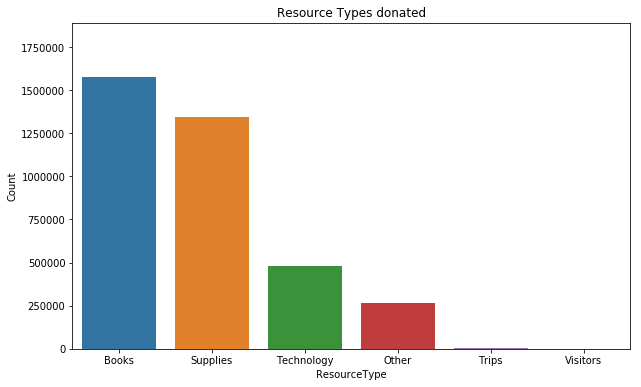

In [9]:
cols = ["resourceid", "project_resource_type"]
projrestype_df = resources_data[cols].groupby(by="project_resource_type", as_index=False).count()
projrestype_df.sort_values(by="resourceid", inplace=True,ascending=False)
f, ax = plt.subplots(1, 1, figsize=(10,6))
plot_bar(x="project_resource_type", y="resourceid", data=projrestype_df, 
         title="Resource Types donated", ylabel="Count", xlabel="ResourceType",
         annot=False, ax=ax)

What's the total value of all the resources provided so far?

In [10]:
resources_data["total_items_price"] = resources_data["item_unit_price"] * resources_data["item_quantity"]
print("Total value of resources provided in millions :", resources_data["total_items_price"].sum()/1e6)

Total value of resources provided in millions : 747.9484194336991


### Vendors 

How have vendors helped?

In [11]:
# Make a vendor map 
vendor_data = resources_data[["vendorid", "vendor_name", "total_items_price"]]
vendor_map = vendor_data.groupby(by=["vendorid", "vendor_name"], as_index=False).sum()
vendor_map.columns = vendor_map.columns.str.strip()

In [12]:
vendor_map = vendor_map.sort_values("total_items_price", ascending=False)
vendor_map["total_items_price"].describe()

count    3.550000e+02
mean     7.694251e+05
std      4.309132e+06
min      3.400000e+01
25%      8.170500e+02
50%      3.007700e+03
75%      1.136187e+04
max      5.200625e+07
Name: total_items_price, dtype: float64

Who were the top 5 vendors who donated?


In [13]:
vendor_map.head()

,vendorid,vendor_name,total_items_price
10,82.0,Best Buy for Business,5.200625e+07
228,767.0,Lakeshore Learning Materials,4.682488e+07
17,178.0,Quill.com,2.148531e+07
2,7.0,AKJ Books,1.802270e+07
13,150.0,CDW-G,1.607742e+07
